In [1]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [3]:
twitters = pd.read_csv('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/Nairobi_1922/Sum/Clean2_screened_twitters.csv')
twitters

,id,text,userid,lat,lon,created_at
0,1079755309281890305,Quick Pose Before The Vibe @KIZAnairobi @ KIZA...,1.498135e+08,-1.290832,36.782992,2018-12-31 15:05:01+00:00
1,1079759392138907649,365/365 \n#whereveryouare #haveagoodone #beTha...,2.081126e+08,-1.283333,36.816667,2018-12-31 15:21:14+00:00
2,1079760884526972928,"Happy 2019 from us @ Nairobi, Kenya https://t....",5.194952e+07,-1.283330,36.816700,2018-12-31 15:27:10+00:00
3,1079762365644660736,"We ride together, We shine together. @ Nairobi...",8.994097e+07,-1.283330,36.816700,2018-12-31 15:33:03+00:00
4,1079765001454477312,We set to usher in the new year 2019 in style ...,2.729705e+08,-1.269244,36.806866,2018-12-31 15:43:32+00:00
...,...,...,...,...,...,...
324613,1542517996685369344,find only Kenyan tea and not a blend. I have o...,1.269599e+18,-1.292066,36.821945,2022-06-30 14:38:43+00:00
324614,1542517994080702464,✦ [ Sakaja ]\n\nQuestion from an American\n\nh...,1.269599e+18,-1.292066,36.821945,2022-06-30 14:38:43+00:00
324615,1542518238566703108,Just posted a photo @ Adams Arcade - Ngong Roa...,1.339887e+18,-1.300567,36.780725,2022-06-30 14:39:41+00:00
324616,1542521919118770184,You better recognize....\nOwner: @kemeigabriel...,8.393942e+17,-1.283330,36.816700,2022-06-30 14:54:18+00:00


In [5]:
# print(twitters.dtypes)
print(twitters.columns)

Index(['id', 'text', 'userid', 'lat', 'lon', 'created_at'], dtype='object')


In [7]:
twitters['created_at'] = pd.to_datetime(twitters['created_at'])
print(twitters.dtypes)

id                          int64
text                       object
userid                    float64
lat                       float64
lon                       float64
created_at    datetime64[ns, UTC]
dtype: object


## Extract the year, month, date, weekday, and hour information

In [9]:
# Create new columns for each date-time feature
twitters['year'] = twitters['created_at'].dt.year
twitters['month'] = twitters['created_at'].dt.month
twitters['day'] = twitters['created_at'].dt.day
twitters['weekday'] = twitters['created_at'].dt.weekday
twitters['hour'] = twitters['created_at'].dt.hour
twitters

,id,text,userid,lat,lon,created_at,year,month,day,weekday,hour
0,1079755309281890305,Quick Pose Before The Vibe @KIZAnairobi @ KIZA...,1.498135e+08,-1.290832,36.782992,2018-12-31 15:05:01+00:00,2018,12,31,0,15
1,1079759392138907649,365/365 \n#whereveryouare #haveagoodone #beTha...,2.081126e+08,-1.283333,36.816667,2018-12-31 15:21:14+00:00,2018,12,31,0,15
2,1079760884526972928,"Happy 2019 from us @ Nairobi, Kenya https://t....",5.194952e+07,-1.283330,36.816700,2018-12-31 15:27:10+00:00,2018,12,31,0,15
3,1079762365644660736,"We ride together, We shine together. @ Nairobi...",8.994097e+07,-1.283330,36.816700,2018-12-31 15:33:03+00:00,2018,12,31,0,15
4,1079765001454477312,We set to usher in the new year 2019 in style ...,2.729705e+08,-1.269244,36.806866,2018-12-31 15:43:32+00:00,2018,12,31,0,15
...,...,...,...,...,...,...,...,...,...,...,...
324613,1542517996685369344,find only Kenyan tea and not a blend. I have o...,1.269599e+18,-1.292066,36.821945,2022-06-30 14:38:43+00:00,2022,6,30,3,14
324614,1542517994080702464,✦ [ Sakaja ]\n\nQuestion from an American\n\nh...,1.269599e+18,-1.292066,36.821945,2022-06-30 14:38:43+00:00,2022,6,30,3,14
324615,1542518238566703108,Just posted a photo @ Adams Arcade - Ngong Roa...,1.339887e+18,-1.300567,36.780725,2022-06-30 14:39:41+00:00,2022,6,30,3,14
324616,1542521919118770184,You better recognize....\nOwner: @kemeigabriel...,8.393942e+17,-1.283330,36.816700,2022-06-30 14:54:18+00:00,2022,6,30,3,14


In [10]:
print(twitters['weekday'].value_counts())
# The day of the week with Monday=0, Sunday=6.

4    49541
3    48846
2    48776
1    47494
0    46959
5    43798
6    39204
Name: weekday, dtype: int64


## Make histogram

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

### Year

In [31]:
print(twitters['year'].value_counts())


2019    113082
2021     86226
2020     81013
2022     44145
2018       152
Name: year, dtype: int64


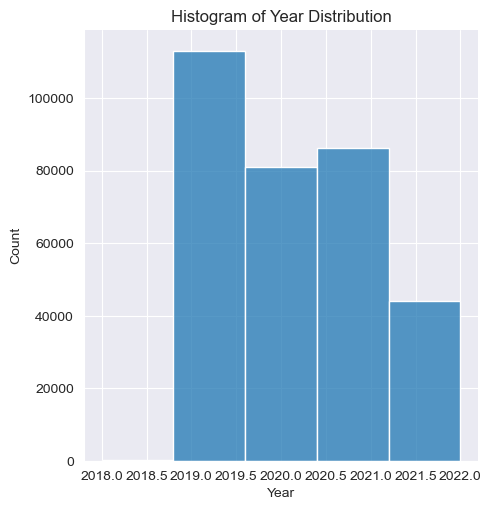

In [32]:
# Create a histogram of the 'year' column using seaborn
sns.displot(data=twitters, x='year', bins=5)

# Add a title and axis labels
sns.set_style('darkgrid')
plt.title('Histogram of Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()

### month

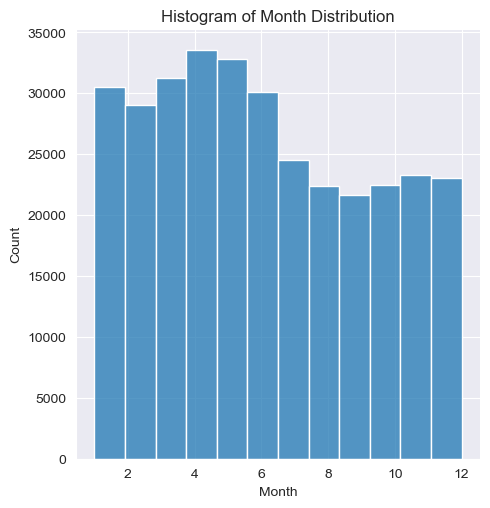

In [33]:
sns.displot(data=twitters, x='month', bins=12)

# Add a title and axis labels
sns.set_style('darkgrid')
plt.title('Histogram of Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

### weekday

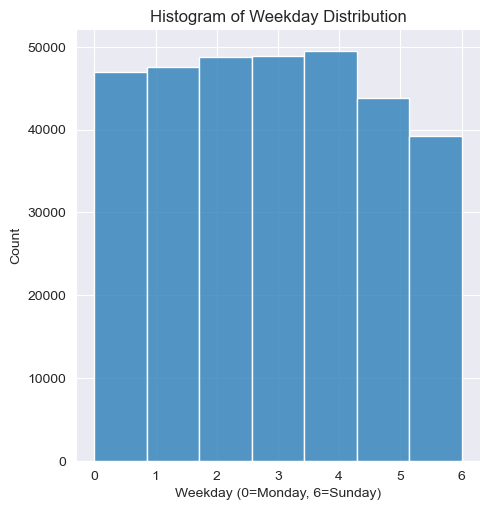

In [25]:
# Create a histogram of the 'weekday' column using seaborn

# sns.displot(data=twitters, x='weekday', bins=7, binwidth=0.5, color='#4CB391')
sns.displot(data=twitters, x='weekday', bins=7)

# Add a title and axis labels
sns.set_style('darkgrid')
plt.title('Histogram of Weekday Distribution')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Count')

# Display the plot
plt.show()

### Hour

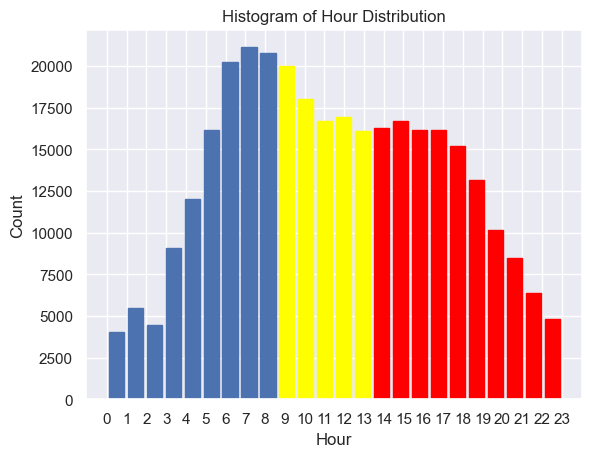

In [59]:
import matplotlib.pyplot as plt
import numpy             as np
import seaborn as sns; 
sns.set(color_codes=True)

number_of_bins = 24
N, bins, patches = plt.hist(twitters['hour'], number_of_bins, rwidth=0.8)

#Define the colors for your pathces (you can write them in any format):
colors    = [ "b", "#ffff00", "red"]
#Define the ranges of your patches:
divisions = [range(9), range(9, 14), range(14, 24)]
#If you want to label the regions/divisions:
labels    = ["Blue", "Yellow", "Red"]

#for each division color the parches according to the specified colors:
for d in divisions:
    patches[list(d)[0]].set_label(labels[divisions.index(d)])
    for i in d:
        patches[i].set_color(colors[divisions.index(d)])

# Add a title and axis labels
sns.set_style('darkgrid')
plt.title('Histogram of Hour Distribution')
plt.xlabel('Hour')
plt.ylabel('Count')

# Customize x-axis ticks
plt.xticks(range(24), labels=['{}'.format(i) for i in range(24)])

# Display the plot
# plt.show()


plt.savefig('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/Nairobi_1922/Sum/Fig/hour_histogram.png', dpi=300, bbox_inches='tight')

In [ ]:
##### Backup ##### 

# Create a histogram of the 'hour' column using seaborn
sns.histplot(data=twitters, x='hour', bins=24)


# Add a title and axis labels
sns.set_style('darkgrid')
plt.title('Histogram of Hour Distribution')
plt.xlabel('Hour')
plt.ylabel('Count')

# Customize x-axis ticks
plt.xticks(range(24), labels=['{}'.format(i) for i in range(24)])

# Display the plot
plt.show()